In [7]:
# Redefine necessary components and train the model

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('irisBinary.csv')

# Map class labels to binary values
data['Iris Class'] = data['Iris Class'].map({'Iris-setosa': 0, 'Iris-versicolor': 1})

# Split dataset into features and labels
X = data[['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']].values
y = data['Iris Class'].values.reshape(-1, 1)
# Standardize the features
X = (X - X.mean(axis=0)) / X.std(axis=0)

from sklearn.model_selection import train_test_split
Xtrain, Xtemp, ytrain, ytemp = train_test_split(X, y, test_size=0.4, random_state=42)
Xval, Xtest, yval, ytest = train_test_split(Xtemp, ytemp, test_size=0.5, random_state=42)



# Sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Sigmoid derivative function
def sigmoid_derivative(x):
    return x * (1 - x)

# Set hyperparameters
input_neurons = 4  # Number of attributes
output_neurons = 1  # Representing the class
epochs = 200

# Store initial weights and biases for reproducibility
initial_weight = np.random.uniform(size=(input_neurons, output_neurons))
initial_bias = np.random.uniform(size=(1, output_neurons))

# Forward propagation
def forward_propagation(X, weight, bias):
    output_layer_input = np.dot(X, weight) + bias
    output = sigmoid(output_layer_input)
    return output

# Backpropagation and training
def train(Xtrain, ytrain, Xval,yval, epochs, learning_rate, initial_weight, initial_bias):
    weight = np.copy(initial_weight)
    bias = np.copy(initial_bias)
    loss_history = []
    
    for epoch in range(epochs):
        output = forward_propagation(Xtrain, weight, bias)
        error = ytrain - output
        delta = error * sigmoid_derivative(output)
        
        weight += np.dot(Xtrain.T, delta) * learning_rate
        bias += np.sum(delta, axis=0, keepdims=True) * learning_rate
        
        loss = np.mean(np.square(ytrain - output))
        loss_history.append(loss)
    
    return weight, bias, loss_history

# Predict function
def predict(Xtest, weight, bias):
    output = forward_propagation(Xtest, weight, bias)
    return output

# Training with different learning rates
learning_rates = [0.001, 0.01, 0.1, 0.5, 1.0]
losses = {}

for lr in learning_rates:
    weight, bias, loss_history = train(Xtrain, ytrain,Xval,yval, epochs, lr, initial_weight, initial_bias)
    losses[lr] = loss_history

    




200
Minimum loss
0.041580225165741655


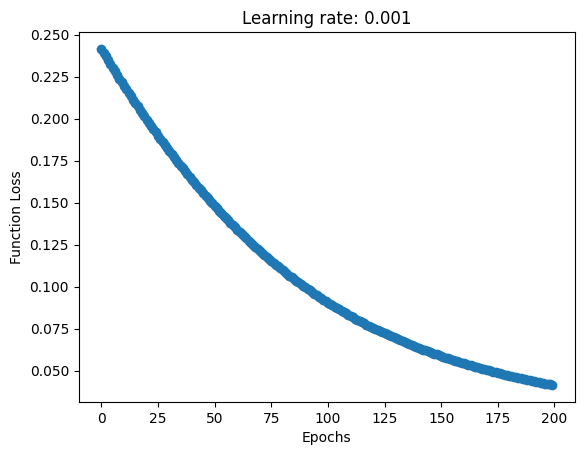

Minimum loss
0.0030400363967196366


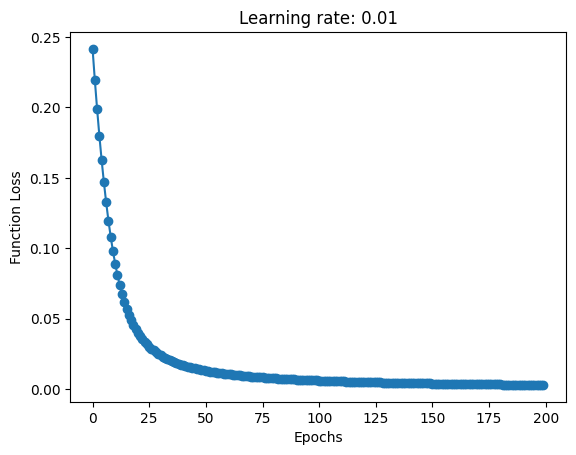

Minimum loss
0.00035493965478607846


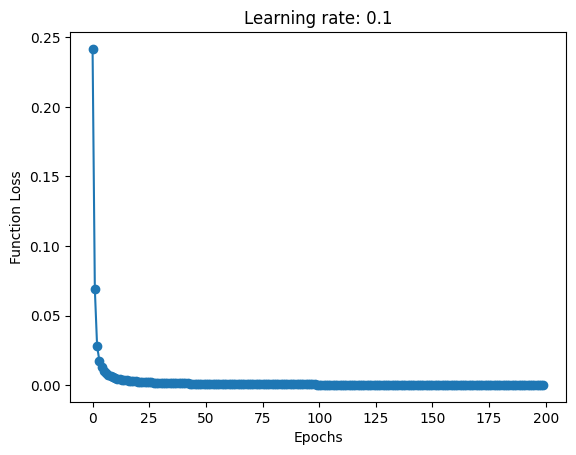

Minimum loss
3.138047258278566e-05


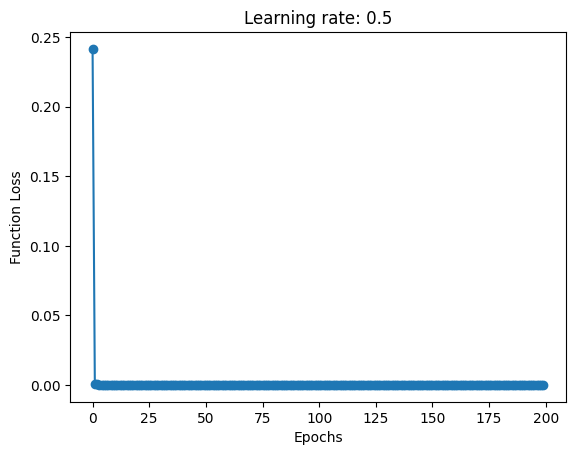

Minimum loss
1.7652699551022843e-06


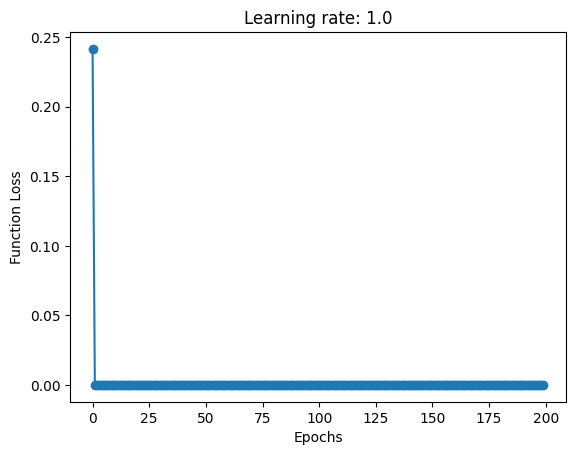

In [8]:
print(len(losses[0.01]))

for loss in losses:

    print("Minimum loss")
    print(losses[loss][-1])


    title = str(loss)
    plt.plot(losses[loss], marker='o')

    # Adding title and labels
    plt.title('Learning rate: {}'.format(title))
    plt.xlabel('Epochs')
    plt.ylabel('Function Loss')

    # Display the graph
    plt.show()